In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats 

In [2]:
df = pd.read_csv('covid-data.csv')

In [3]:
df['date'] = pd.to_datetime(df['date'])

# A1

In [4]:
#Gets 23/03/2020 date and max total_cases for all locations except World
date_greece_lockdown_started = df[(df['date'] == '2020-03-23') & (df['location'] != 'World')]['total_cases'].max()

#Matches total cases with date_greek_lockdown_started to get location
location = df.loc[df['total_cases'] == date_greece_lockdown_started] 

#Variables to save name and total cases after search
name = location.iloc[0,2] #from row 0 column 2 gets name
total_cases = location.iloc[0,4] #from row 0 column 4 gets total_deaths

print(f"{name} had the most total cases ({total_cases.astype(int)}) when Greece's lockdown started")

China had the most total cases (81484) when Greece's lockdown started


# A2

In [5]:
#Gets max new_cases from second to last week of March for all locations except World
second_to_last_week_of_march = df[(df['date'] >= '2020-03-23') & (df['date'] <= '2020-03-29') & (df['location'] != 'World')]['new_cases'].max()

#Matches new_cases with second_to_last_week_of_march to get location
location = df.loc[df['new_cases'] == second_to_last_week_of_march]  

#Variables to save name and new cases after search
name = location.iloc[0,2] #from row 0 and column 2 gets name
new_cases = location.iloc[0,5] #from row 0 and column 5 gets new_cases

print(f"{name} had the most new cases ({new_cases.astype(int)}) during 23-29/03/2020")

United States had the most new cases (19979) during 23-29/03/2020


# A3

In [6]:
#Sets location to Greece (Finds all rows with the location as Greece)
greece = (df['location'] == 'Greece')

#Dates before first lockdown
dates_before_first_lockdown = df[greece & ((df['date'] >= '2020-03-16') & (df['date'] <= '2020-03-22'))] 

#Sum of new cases from dates before first lockdown
sum_of_new_cases_before_first_lockdown = dates_before_first_lockdown['new_cases'].sum()

#Dates before second lockdown
dates_before_second_lockdown = df[greece & ((df['date'] >= '2020-10-31') & (df['date'] <= '2020-11-06'))] 

#Sum of new cases from dates before second lockdown
sum_of_new_cases_before_second_lockdown = dates_before_second_lockdown['new_cases'].sum()

print(f'Before the first lockdown (16-22/3/2020) Greece had: {sum_of_new_cases_before_first_lockdown.astype(int)} cases')
print(f'Before the second lockdown (31/10/2020 - 6/11/2020) Greece had: {sum_of_new_cases_before_second_lockdown.astype(int)} cases')

Before the first lockdown (16-22/3/2020) Greece had: 302 cases
Before the second lockdown (31/10/2020 - 6/11/2020) Greece had: 14297 cases


# A4

In [7]:
#Finds max total_deaths_per_million
max_total_deaths_per_million = df["total_deaths_per_million"].max()

#Matches total_deaths_per_million with max_total_deaths_per_million to get location
location = df.loc[df['total_deaths_per_million'] == max_total_deaths_per_million]

#Variables to save name and total deaths per million after search
name = location.iloc[0,2] #from location gets row 0 and column 2 to find the name
total_deaths_per_million = location.iloc[0,13] #from location gets row 0 and column 13 to find the total_deaths_per_million

print(f'{name} had the most total deaths per million: {total_deaths_per_million.round(decimals=2)}')

Belgium had the most total deaths per million: 1350.09


# A5

In [8]:
#Gets last date for all locations except World and International
all_locations_latest_date = df[(df['date'] == df['date'].max()) & (df['location'] != 'World') & (df['location'] != 'International')]

#Finds the percentage by total_deaths / total_cases and gets the max
max_percentage = all_locations_latest_date['total_deaths'].div(all_locations_latest_date['total_cases']).max()

#Divides each row of all_locations_latest_date with total_deaths / total_cases and matches with max_percentage to find the correct row
location_with_most_deaths_per_case = all_locations_latest_date['total_deaths'].div(all_locations_latest_date['total_cases']) == max_percentage

#Gets the name from row 0 and column location
name = all_locations_latest_date[location_with_most_deaths_per_case]['location'].iloc[0]

print(f'{name} has the most deaths per case with percentage: {(max_percentage*100).round(decimals=2)}%')

Yemen has the most deaths per case with percentage: 28.9%


# B1

In [9]:
#Groups location Greece and months and accesses new_deaths and new_cases columns and for each finds the median and std
greece_new_deaths_and_cases = df[greece].groupby(df[greece]['date'].dt.month)[['new_deaths', 'new_cases']].agg(['median','std']).round(decimals = 2)
greece_new_deaths_and_cases.dropna()

new_deaths        new_cases        
         median    std    median     std
date                                    
1           0.0   0.00       0.0    0.00
2           0.0   0.00       0.0    0.44
3           1.0   1.84      35.0   31.87
4           3.0   2.43      32.0   39.83
5           1.0   1.04      10.0    8.72
6           0.0   0.90      14.0   12.07
7           0.0   0.72      29.0   14.38
8           2.0   1.62     193.0   62.54
9           4.0   2.19     255.5   82.85
10          7.0   3.50     438.0  378.47
11         41.0  28.64    2402.5  621.04

# B2

In [10]:
#Finds location that matches Portugal
portugal = df['location'] == "Portugal" 

#Groups location Portugal and months and accesses new_deaths and new_cases columns and for each finds the median and std
portugal_new_deaths_and_cases = df[portugal].groupby(df[portugal]['date'].dt.month)[['new_deaths', 'new_cases']].agg(['median','std']).round(decimals = 2)
portugal_new_deaths_and_cases.dropna()

new_deaths        new_cases         
         median    std    median      std
date                                     
3           0.0   7.51      86.0   271.80
4          27.5   8.33     620.5   280.45
5          13.0   6.58     228.0   137.89
6           5.5   3.78     327.0    75.00
7           5.0   3.07     291.0    98.83
8           3.0   1.83     213.0    88.33
9           4.0   2.62     595.0   191.78
10         15.0   9.02    1876.0  1151.11
11         62.0  14.81    5667.0  1555.36

In [11]:
#Shows the sum of median, std for new_deaths and new_cases in Greece
greece_new_deaths_and_cases.sum()

new_deaths  median      59.00
            std         42.88
new_cases   median    3409.00
            std       1252.21
dtype: float64

In [12]:
#Shows the sum of median, std for new_deaths and new_cases in Portugal
portugal_new_deaths_and_cases.sum()

new_deaths  median     135.00
            std         57.55
new_cases   median    9903.50
            std       3850.55
dtype: float64

In [13]:
print('Based on the above data Greece does better than Portugal')

Based on the above data Greece does better than Portugal


# B3

In [14]:
#Finds location that matches Japan
japan = df['location'] == 'Japan'

japan_total_cases = df[japan]['total_cases'].dropna()
japan_total_tests = df[japan]['total_tests'].dropna()
japan_total_deaths = df[japan]['total_deaths'].dropna()

In [15]:
#Prints descriptive statistics
print('Japan Total Cases:\nMinimum Cases:',japan_total_cases.min().astype(int))
print('Maximum Cases:',japan_total_cases.max().astype(int))
print('Average Number of Cases:',japan_total_cases.mean().round(decimals=2))
print('Variance:',japan_total_cases.var().round(decimals=2))
print('Standard Deviation:',japan_total_cases.std().round(decimals=2))

Japan Total Cases:
Minimum Cases: 1
Maximum Cases: 133929
Average Number of Cases: 36704.37
Variance: 1450026028.23
Standard Deviation: 38079.21


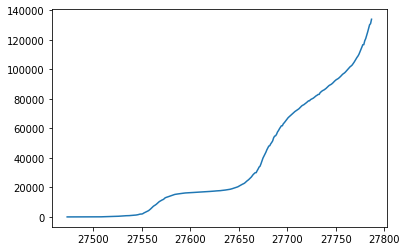

In [16]:
plt.plot(japan_total_cases)

In [17]:
print('Japan Total Tests:\nMinimum Tests:',japan_total_tests.min().astype(int))
print('Maximum Tests:',japan_total_tests.max().astype(int))
print('Average Number of Tests:',japan_total_tests.mean().round(decimals=2))
print('Variance:',japan_total_tests.var().round(decimals=2))
print('Standard Deviation:',japan_total_tests.std().round(decimals=2))

Japan Total Tests:
Minimum Tests: 5266
Maximum Tests: 3703793
Average Number of Tests: 1869293.82
Variance: 1941872161666.19
Standard Deviation: 1393510.73


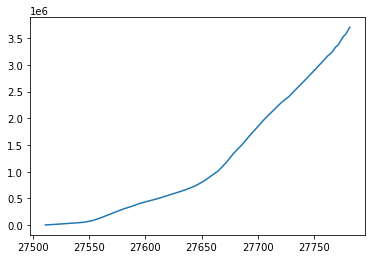

In [18]:
plt.plot(japan_total_tests)

In [19]:
print('Japan Total Deaths:\nMinimum Deaths:',japan_total_deaths.min().astype(int))
print('Maximum Deaths:',japan_total_deaths.max().astype(int))
print('Average Number of Deaths:',japan_total_deaths.mean().round(decimals=2))
print('Variance:',japan_total_deaths.var().round(decimals=2))
print('Standard Deviation:',japan_total_deaths.std().round(decimals=2))

Japan Total Deaths:
Minimum Deaths: 1
Maximum Deaths: 1989
Average Number of Deaths: 909.93
Variance: 375126.75
Standard Deviation: 612.48


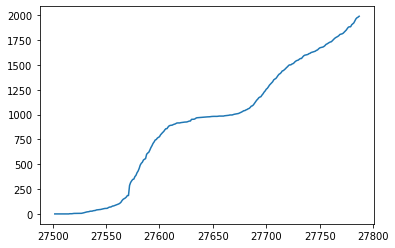

In [20]:
plt.plot(japan_total_deaths)

# C1

In [21]:
#Correlation
world = df[df['location'] == 'World']

world_total_cases_and_deaths = world[['total_cases','total_deaths']].dropna()

r, p = stats.pearsonr(world_total_cases_and_deaths['total_cases'], world_total_cases_and_deaths['total_deaths'])

In [22]:
r.round(decimals=2)

0.97

In [23]:
p

1.0450573665648478e-201

# C2

In [24]:
#T test
max_date_locations = df[(df['date'] == df['date'].max()) & (df['location'] != 'World') & (df['location'] != 'International')][['gdp_per_capita','total_deaths_per_million']].dropna()

t, p = stats.ttest_rel(max_date_locations['gdp_per_capita'], max_date_locations['total_deaths_per_million'])

In [25]:
t.round(decimals=2)

12.44

In [26]:
p

1.415571764830309e-25

# C3

In [27]:
#Correlation

total_tests_and_total_cases_max_date_locations= df[(df['date'] == df['date'].max()) & (df['location'] != 'World') & (df['location'] != 'International')][['total_tests','total_cases']].dropna() 

r, p = stats.pearsonr(total_tests_and_total_cases_max_date_locations['total_tests'], total_tests_and_total_cases_max_date_locations['total_cases'])

In [28]:
r.round(decimals=2)

0.83

In [29]:
p.round(decimals=2)

0.04

# C4

In [30]:
#Correlation
world = df[df['location'] == 'World']


male_smokers_and_cardio_death_rate = df[(df['date'] == df['date'].max()) & (df['location'] != 'World') & (df['location'] != 'International')][['male_smokers','cardiovasc_death_rate']].dropna() 

r, p = stats.pearsonr(male_smokers_and_cardio_death_rate['male_smokers'], male_smokers_and_cardio_death_rate['cardiovasc_death_rate'])

In [31]:
r.round(decimals=2) 

0.41

In [32]:
p 

5.100672716077338e-07

In [33]:
#Correlation
world = df[df['location'] == 'World']


poverty_and_life_expectancy = df[(df['date'] == df['date'].max()) & (df['location'] != 'World') & (df['location'] != 'International')][['extreme_poverty','life_expectancy']].dropna() 

r, p = stats.pearsonr(poverty_and_life_expectancy['extreme_poverty'], poverty_and_life_expectancy['life_expectancy'])

In [34]:
r.round(decimals=2)

-0.75

In [35]:
p

5.413033000441598e-23